<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-code" data-toc-modified-id="Import-code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import code</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#Data-query" data-toc-modified-id="Data-query-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data query</a></span></li><li><span><a href="#Computing-extinctions" data-toc-modified-id="Computing-extinctions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Computing extinctions</a></span></li><li><span><a href="#Integrated-extinction-along-the-line-of-sight" data-toc-modified-id="Integrated-extinction-along-the-line-of-sight-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Integrated extinction along the line of sight</a></span></li><li><span><a href="#Age-estimate-for-a-list-of-stars" data-toc-modified-id="Age-estimate-for-a-list-of-stars-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Age estimate for a list of stars</a></span></li><li><span><a href="#Mass-estimate-for-$\beta$-Pictoris-b" data-toc-modified-id="Mass-estimate-for-$\beta$-Pictoris-b-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Mass estimate for $\beta$ Pictoris b</a></span></li></ul></li><li><span><a href="#Utils" data-toc-modified-id="Utils-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Utils</a></span><ul class="toc-item"><li><span><a href="#Printing-information-about-a-model" data-toc-modified-id="Printing-information-about-a-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Printing information about a model</a></span></li><li><span><a href="#Printing-information-about-a-filter" data-toc-modified-id="Printing-information-about-a-filter-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Printing information about a filter</a></span></li><li><span><a href="#Visualizing-the-variation-of-a-quantity-across-the-isochrone-grid" data-toc-modified-id="Visualizing-the-variation-of-a-quantity-across-the-isochrone-grid-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualizing the variation of a quantity across the isochrone grid</a></span></li><li><span><a href="#Handling-analysis-results" data-toc-modified-id="Handling-analysis-results-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Handling analysis results</a></span></li></ul></li></ul></div>

## Import code

In [1]:
#import sys
#sys.path.append(r'C:\Users\Vito\Desktop\PhD\Progetti\MADYS')
from madys import *

## Examples

### Data query

In this case, the input is a .csv file. A column with IDs (labeled as 'source_id', 'id', 'ID' or 'object_name') must be present. Selecting an extinction map will automatically execute the extinction module, returning the integrated color excess E(B-V) for the whole sample. verbose=0 means that no output file is desired.

Output data are stored in an astropy table, accessible through the instance attribute 'phot_table'.

In [2]:
f=r'C:\Users\Vito\Desktop\PhD\Programmi\Python\MADYS\1000stars.csv' #1000 random stars
p1=SampleObject(f,id_type='EDR3',ext_map='leike',verbose=0) #collects data 
p1.phot_table

ID,edr3_id,dr2_id,tmass_id,ra,dec,edr3_epoch,edr3_parallax,edr3_parallax_error,edr3_parallax_over_error,edr3_pmra,edr3_pmra_error,edr3_pmdec,edr3_pmdec_error,edr3_ra_dec_corr,edr3_ra_parallax_corr,edr3_ra_pmra_corr,edr3_ra_pmdec_corr,edr3_dec_parallax_corr,edr3_dec_pmra_corr,edr3_dec_pmdec_corr,edr3_parallax_pmra_corr,edr3_parallax_pmdec_corr,edr3_pmra_pmdec_corr,edr3_phot_g_mean_mag,edr3_phot_g_mean_flux,edr3_phot_g_mean_flux_error,edr3_phot_bp_mean_flux,edr3_phot_bp_mean_flux_error,edr3_phot_bp_mean_mag,edr3_phot_rp_mean_flux,edr3_phot_rp_mean_flux_error,edr3_phot_rp_mean_mag,edr3_bp_rp,edr3_phot_bp_rp_excess_factor,edr3_ruwe,edr3_astrometric_params_solved,dr2_epoch,dr2_ra,dr2_dec,dr2_parallax,dr2_parallax_error,dr2_parallax_over_error,dr2_pmra,dr2_pmra_error,dr2_pmdec,dr2_pmdec_error,dr2_ra_dec_corr,dr2_ra_parallax_corr,dr2_ra_pmra_corr,dr2_ra_pmdec_corr,dr2_dec_parallax_corr,dr2_dec_pmra_corr,dr2_dec_pmdec_corr,dr2_parallax_pmra_corr,dr2_parallax_pmdec_corr,dr2_pmra_pmdec_corr,dr2_phot_g_mean_mag,dr2_phot_g_mean_flux,dr2_phot_g_mean_flux_error,dr2_phot_bp_mean_flux,dr2_phot_bp_mean_flux_error,dr2_phot_bp_mean_mag,dr2_phot_rp_mean_flux,dr2_phot_rp_mean_flux_error,dr2_phot_rp_mean_mag,dr2_bp_rp,dr2_phot_bp_rp_excess_factor,dr2_ruwe,dr2_astrometric_params_solved,radial_velocity,radial_velocity_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual,tmass_ra,tmass_dec,edr3_gmag_corr,edr3_gflux_corr,edr3_phot_bp_rp_excess_factor_corr,edr3_phot_g_mean_mag_error,edr3_phot_bp_mean_mag_error,edr3_phot_rp_mean_mag_error,dr2_phot_bp_rp_excess_factor_corr,dr2_g_mag_error,dr2_bp_mag_error,dr2_rp_mag_error,ebv
,,,,deg,deg,yr,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,yr,deg,deg,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,mag,mag,mag,mag,mag,mag,,deg,deg,mag,'electron'.s**-1,,mag,mag,mag,,mag,mag,mag,
str29,object,object,object,float64,float64,float64,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,int16,float64,float64,float32,float32,float32,float32,float32,float32,object,float64,float64,float32,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64
Gaia EDR3 2366354219331687424,Gaia EDR3 2366354219331687424,Gaia DR2 2366354219331687424,,3.6657651150862476,-17.746083295306384,2016.0,2.354827723587085,0.63192326,3.7264457,12.27865046582723,0.5813766,-10.558471780118596,0.4574035,0.09336256,0.3585739,0.02866605,-0.23125511,-0.22947522,-0.16860533,0.25066614,0.13609187,-0.34997198,0.2376678,20.199186,156.77328270979658,0.7971533,55.81921524659454,7.7721167,20.971582,174.69299713012217,7.73365,19.142206,1.8293762,1.470354,1.0173416,95,2015.5,3.6657633695488694,-17.74608182179676,2.988558882158716,0.8182471625402488,3.6523914,12.961086655781882,1.2630927641303522,-10.138037509869191,1.0014417748158504,0.37273696,0.40107888,-0.0059894943,-0.12352996,0.07581845,-0.010687782,0.28736278,0.2526259,-0.09822902,0.47409418,20.25437,149.14136787427273,1.0296047689310739,62.849263812395144,12.142045578420314,20.855639,187.4434699486805,8.174621902440931,19.079744,1.7758942,1.6782248,0.95120853,31,--,--,--,--,--,--,--,--,,--,--,20.193235,157.63483784897122,0.15853286,0.006170081708927629,0.151200712500935,0.048213842648264435,0.32178774,0.00798581928568128,0.20977532507354146,0.04750077616746337,0.012528131267155766
Gaia EDR3 2366354223626875392,Gaia EDR3 23663

A list of names can be provided too. If id_type='EDR3' ('DR2'), they must begin by 'Gaia EDR3' ('Gaia DR2'):

In [3]:
star_list=['Gaia EDR3 537529798644191232','Gaia EDR3 1087909890317863040', 'Gaia EDR3 5836041389104329216', 'Gaia EDR3 987536165308035328', 'Gaia EDR3 4225093954826903680']
p2=SampleObject(star_list,id_type='EDR3',ext_map=None)
p2.phot_table

ID,edr3_id,dr2_id,tmass_id,ra,dec,edr3_epoch,edr3_parallax,edr3_parallax_error,edr3_parallax_over_error,edr3_pmra,edr3_pmra_error,edr3_pmdec,edr3_pmdec_error,edr3_ra_dec_corr,edr3_ra_parallax_corr,edr3_ra_pmra_corr,edr3_ra_pmdec_corr,edr3_dec_parallax_corr,edr3_dec_pmra_corr,edr3_dec_pmdec_corr,edr3_parallax_pmra_corr,edr3_parallax_pmdec_corr,edr3_pmra_pmdec_corr,edr3_phot_g_mean_mag,edr3_phot_g_mean_flux,edr3_phot_g_mean_flux_error,edr3_phot_bp_mean_flux,edr3_phot_bp_mean_flux_error,edr3_phot_bp_mean_mag,edr3_phot_rp_mean_flux,edr3_phot_rp_mean_flux_error,edr3_phot_rp_mean_mag,edr3_bp_rp,edr3_phot_bp_rp_excess_factor,edr3_ruwe,edr3_astrometric_params_solved,dr2_epoch,dr2_ra,dr2_dec,dr2_parallax,dr2_parallax_error,dr2_parallax_over_error,dr2_pmra,dr2_pmra_error,dr2_pmdec,dr2_pmdec_error,dr2_ra_dec_corr,dr2_ra_parallax_corr,dr2_ra_pmra_corr,dr2_ra_pmdec_corr,dr2_dec_parallax_corr,dr2_dec_pmra_corr,dr2_dec_pmdec_corr,dr2_parallax_pmra_corr,dr2_parallax_pmdec_corr,dr2_pmra_pmdec_corr,dr2_phot_g_mean_mag,dr2_phot_g_mean_flux,dr2_phot_g_mean_flux_error,dr2_phot_bp_mean_flux,dr2_phot_bp_mean_flux_error,dr2_phot_bp_mean_mag,dr2_phot_rp_mean_flux,dr2_phot_rp_mean_flux_error,dr2_phot_rp_mean_mag,dr2_bp_rp,dr2_phot_bp_rp_excess_factor,dr2_ruwe,dr2_astrometric_params_solved,radial_velocity,radial_velocity_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual,tmass_ra,tmass_dec,edr3_gmag_corr,edr3_gflux_corr,edr3_phot_bp_rp_excess_factor_corr,edr3_phot_g_mean_mag_error,edr3_phot_bp_mean_mag_error,edr3_phot_rp_mean_mag_error,dr2_phot_bp_rp_excess_factor_corr,dr2_g_mag_error,dr2_bp_mag_error,dr2_rp_mag_error,ebv
,,,,deg,deg,yr,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,yr,deg,deg,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,electron / s,electron / s,electron / s,electron / s,mag,electron / s,electron / s,mag,mag,,,,km / s,km / s,mag,mag,mag,mag,mag,mag,,deg,deg,mag,'electron'.s**-1,,mag,mag,mag,,mag,mag,mag,
str29,object,object,object,float64,float64,float64,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,int16,float64,float64,float32,float32,float32,float32,float32,float32,object,float64,float64,float32,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64
Gaia EDR3 537529798644191232,Gaia EDR3 537529798644191232,Gaia DR2 537529794344425984,00112647+7300292,2.8604158023452304,73.00825074261374,2016.0,3.000000088729845,1.4241152,2.1065712,16.987371004711246,1.9610943,9.905987492581449,1.6226295,0.022035293,0.13738126,0.16689672,-0.06876506,0.04064269,-0.103836715,0.060810227,-0.15653208,0.12218038,0.12875833,20.264465,147.62530107446972,2.1547186,48.44005240209921,6.6693745,21.12553,286.33650761762124,7.148981,18.605703,2.519827,2.2677453,4.152212,95,2015.5,2.860404321813468,73.00824800187223,--,--,--,--,--,--,--,0.19682264,--,--,--,--,--,--,--,--,--,20.080318,175.0728362759991,2.2729261635767934,36.55137766891464,5.7415257449766015,21.444128,281.5868664855298,7.817109446514105,18.63789,2.8062382,1.8171765,--,3,--,--,16.751,0.14,16.126,0.171,15.965,--,CCU,2.860311,73.008133,20.246466,150.09312929996005,0.8581704,0.016085002072989678,0.14951350720747578,0.027369835556741374,0.30030861,0.014362604928154658,0.17057131485475455,0.030377056053629992,0.0
Gaia EDR3 1087909890317863040,Gaia EDR3 1087909890317863040,Gaia DR2 1087909890317863040,07420208+6125252,115.50892215322277,61.42371692810919,2016.0,3.0000000889947693,0.013043495,229.99973,24.25767835297942

### Computing extinctions

Manually computes extinctions for the 1000 stars from the sample above.

If the selected map is not found in the extinction folder, it asks the permission to download it.

In [5]:
ra=np.array(p1.good_phot['ra'].filled(np.nan))
dec=np.array(p1.good_phot['dec'].filled(np.nan))
par=np.array(p1.good_phot['edr3_parallax'].filled(np.nan))
par_err=np.array(p1.good_phot['edr3_parallax_error'].filled(np.nan))

tt0=time.perf_counter()
SampleObject.interstellar_ext(ra=ra,dec=dec,par=par)
tt1=time.perf_counter()
SampleObject.interstellar_ext(ra=ra,dec=dec,par=par,ext_map='stilism')
tt2=time.perf_counter()

print("Total time needed to compute extinction for "+ str(len(ra))+ " targets (Leike's map): - {:.2f}".format(tt1-tt0)+' s')
print("Total time needed to compute extinction for "+ str(len(ra))+ " targets (STILISM map): - {:.2f}".format(tt2-tt1)+' s')

Total time needed to compute extinction for 1000 targets (Leike's map): - 2.07 s
Total time needed to compute extinction for 1000 targets (STILISM map): - 12.31 s


### Integrated extinction along the line of sight

Reproduce the left panel of Fig. 1 from the paper. Relevant keywords:

- ra (l): a two-element list with minimum and maximum right ascension (galactic longitude) to be plotted on the x axis;
- dec (b): a two-element list with minimum and maximum declination (galactic latitude) to be plotted on the y axis;
- par (d): float or int. Parallax (distance) corresponding to the depth of the integration [mas] ([pc]);
- color: any valid filter (e.g., 'G') or color (e.g., 'G-K') present in MADYS. See SampleObject.info_filters(color) to see if the filter exists.

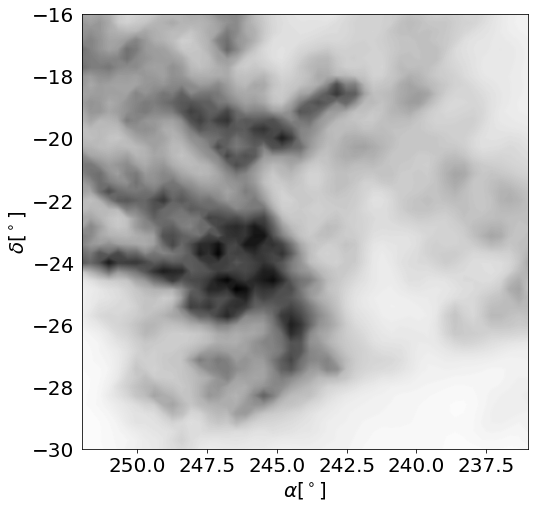

In [6]:
grid_x=np.linspace(236,252,1000)
grid_y=np.linspace(-30,-16,1000)
XX, YY = np.meshgrid(grid_x,grid_y)

fontsize=20

fig, ax = plt.subplots(figsize=(8,8))
SampleObject.plot_2D_ext(ra=[236,252],dec=[-30,-16],d=160,color='G',reverse_xaxis=True,cmap='gray_r',fontsize=fontsize,colorbar=False,ax=ax)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='major', bottom=False)
ax.set_xlabel(r'$\alpha [^\circ]$',fontsize=fontsize)
plt.show()

### Age estimate for a list of stars

An example of age and mass estimation: we analyze 73 young stars belonging to the Scorpius-Centaurus association.

In [2]:
els_file=r'C:\Users\Vito\Desktop\PhD\My papers\MADYS\els.txt'

els_obj=SampleObject(els_file,id_type='EDR3',verbose=0,ext_map='leike')
result=els_obj.get_params('bhac15',age_range=[1,300],n_try=200,save_maps=True)

Program running. Done: 36/73 (49.3%). Estimated time left: 67 s.
Execution ended. Elapsed time: 99 s.


To plot the chi2 map (as defined in the paper) for the sixth star, i.e. the one with index 5:

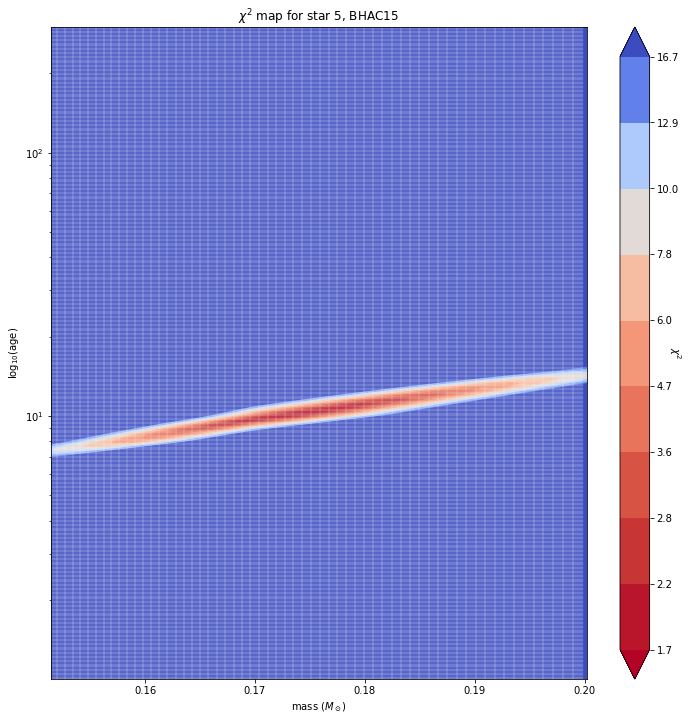

In [3]:
result.plot_maps(5)

A MADYS instance can be directly plotted in a CMD:

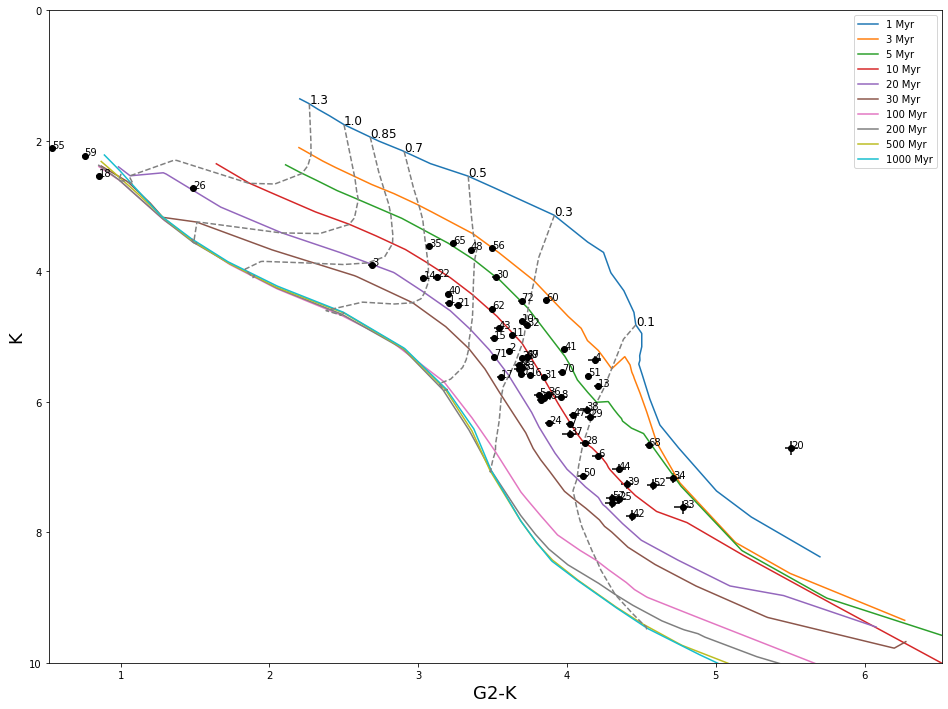

In [15]:
els_obj.CMD('G-K','K','bhac15')

('G2' here means that the BHAC15 model are equipped with Gaia DR2 filters.)

### Mass estimate for $\beta$ Pictoris b

Example of mode 2: a Table is provided as input at inizialization. Suitable for directly-imaged objects.

In [4]:
input_data=Table([['beta Pic b'],[9+3.526],[np.sqrt(0.222**2+0.2**2)],[50.930690628822894],[0.14821085]],names=('object_name','SPH_K1','SPH_K1_err','parallax','parallax_err'))
obj=SampleObject(input_data,verbose=0,ext_map='leike')
res=obj.get_params('ames_dusty',mass_range=[0.005,0.1],age_range=np.array([[15,12,21]]),m_unit='m_jup',ph_cut=0.8,n_try=10000)

Execution ended. Elapsed time: 23 s.


Creates an astropy table containing the results:

In [10]:
res_table=res.to_table()
res_table.round(3)
res_table

objects,ages,ages_min,ages_max,masses,masses_min,masses_max,ebv,radii,radii_min,radii_max,logg,logg_min,logg_max,logL,logL_min,logL_max,Teff,Teff_min,Teff_max,fit_status
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
beta Pic b,15.0,12.0,21.0,10.784,9.536,11.943,0.0,1.457,1.421,1.493,4.096,4.043,4.15,-3.879,-3.979,-3.761,1614.803,1536.158,1709.729,0


Or, alternatively, the results can be directly printed in an interactive mode:

In [11]:
res.pprint('in_notebook')

idx,objects,ages,ages_min,ages_max,masses,masses_min,masses_max,ebv,radii,radii_min,radii_max,logg,logg_min,logg_max,logL,logL_min,logL_max,Teff,Teff_min,Teff_max,fit_status
0,beta Pic b,15.0,12.0,21.0,10.784209506679664,9.535798009729918,11.942552994880062,0.0,1.4568091311449647,1.4212392402065892,1.4926446300155645,4.095993735326877,4.043119763461101,4.150230781285556,-3.8785019440514823,-3.9788720243170514,-3.761362449765398,1614.8030850379696,1536.1582725860603,1709.7288808104806,0


## Utils

### Printing information about a model

In [12]:
IsochroneGrid.info_models('atmo2020')

Model name: ATMO 2020
Reference: Phillips et al., A&A 637, A38 (2020)
Solar metallicity: Z=0.0169
Helium abundance: Y=0.275
Mass range: [0.001,0.075] M_sun
Age range: [1 Myr, 10 Gyr]
Filters: MKO-NIR (MKO_Y, MKO_J, MKO_H, MKO_K, MKO_Lp, MKO_Mp), WISE (W1, W2, W3, W4), Spitzer-IRAC (IRAC1, IRAC2), JWST (MIRI: MIRI_c_F1065C, MIRI_c_F1140C, MIRI_c_F1550C, MIRI_c_F2300C; MIRI_p_F560W, MIRI_p_F770W, MIRI_p_F1000W, MIRI_p_F1130W, MIRI_p_F1280W, MIRI_p_F1500W, MIRI_p_F1800W, MIRI_p_F2100W, MIRI_p_F2550W; NIRCAM: NIRCAM_c210_F182M, NIRCAM_c210_F187N, NIRCAM_c210_F200W, NIRCAM_c210_F210M, NIRCAM_c210_F212N; NIRCAM_c335_F250M, NIRCAM_c335_F300M, NIRCAM_c335_F322W2, NIRCAM_c335_F335M, NIRCAM_c335_F356W, NIRCAM_c335_F360M, NIRCAM_c335_F410M, NIRCAM_c335_F430M, NIRCAM_c335_F444W, NIRCAM_c335_F460M, NIRCAM_c335_F480M; NIRCAM_c430_F250M, NIRCAM_c430_F300M, NIRCAM_c430_F322W2, NIRCAM_c430_F335M, NIRCAM_c430_F356W, NIRCAM_c430_F360M, NIRCAM_c430_F410M, NIRCAM_c430_F430M, NIRCAM_c430_F444W, NIRCAM_c430_

### Printing information about a filter

An error is raised if the selected filter does not exist.

In [9]:
SampleObject.info_filters('SPH_K2')

Quantity name: 'SPH_K2'

Description: SPHERE IRDIS @ VLT K2 filter (dual band: K1-K2)
Reference: Krol et al., Proc. SPIE 8168 (2011)
Available in the following models: BHAC15, AMES-Cond, AMES-Dusty, BT-Settl, NextGen


### Visualizing the variation of a quantity across the isochrone grid

A direct way to inspect the dynamical range of a given model, and the magnitudes corresponding to a certain mass and age:

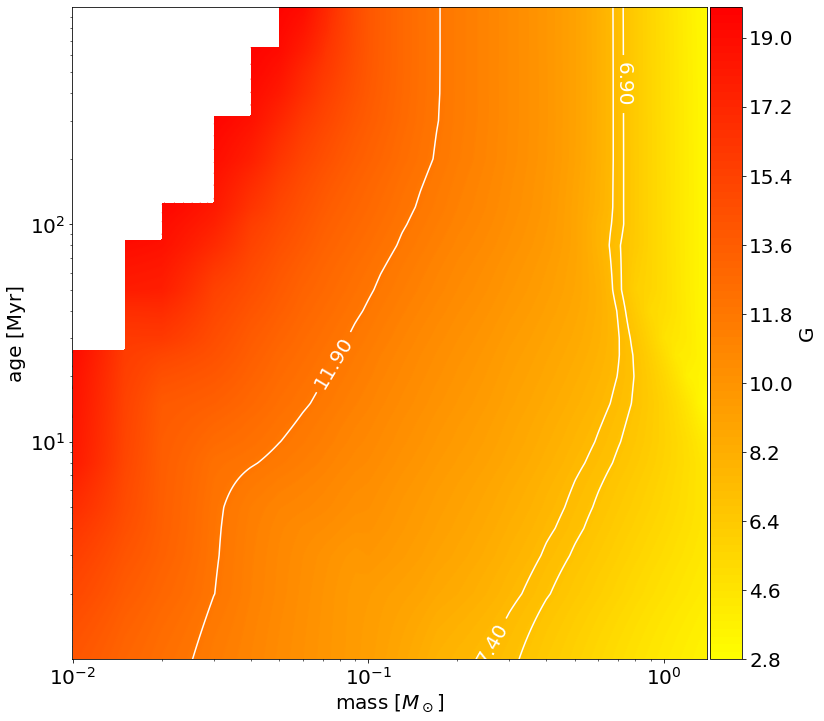

In [14]:
IsochroneGrid.plot_iso_grid('G','bhac15',x_log=True,y_log=True,levels=[6.9,7.4,11.9],fontsize=20,cmap='autumn_r')

### Handling analysis results

Let's consider again 'result', the object that stores the results of the analysis for the file 'els.txt'.

The object is an instance of the FitParams class:

In [10]:
type(result)

madys.madys.FitParams

which is a dictionary which supports indexing and item assignment, just like a numpy array. The reference is, as usual, the original list of stars/substellar objects. In particular, indexing the object returns the object that would have been generated if the original list were indexed in the same way.

The len() of a FitParams object is equal to the number of stars in the original list.

In [18]:
result[[5,12]].pprint('in_notebook')

idx,objects,ages,ages_min,ages_max,masses,masses_min,masses_max,ebv,radii,radii_min,radii_max,logg,logg_min,logg_max,logL,logL_min,logL_max,Teff,Teff_min,Teff_max,fit_status
0,Gaia EDR3 5971656596373210496,10.373145911019334,9.40935122108595,11.43566156295296,0.1749746583584867,0.16825176483696103,0.1819661808441458,0.07626221771050427,0.5454822849471785,0.5195051541082735,0.5757401741037176,4.20970369775751,4.17663300957322,4.237327200619073,-1.5540337303176432,-1.601451862885458,-1.501653539895904,3204.7769960106198,3192.2261439977747,3216.906701333104,0
1,Gaia EDR3 5970997817105415552,9.697235986120445,8.85248466993116,10.622597979742181,0.24672971761217885,0.23838993647719484,0.2553612558171434,0.14589979394097755,0.6535876477813147,0.6250083686347443,0.6860783430356615,4.194785726121135,4.165878610438982,4.221034375980496,-1.3479619824936977,-1.392328553267174,-1.300146345348512,3297.064184049494,3285.318932236876,3309.5196343212765,0
